Import Libraries

In [212]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

Explore the data

In [213]:
path_to_data = "/Users/alicja/Desktop/PROJECT/Healthcare-Diabetes.csv"
df = pd.read_csv(path_to_data)

In [214]:
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [215]:
df.shape

(2768, 10)

In [216]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [218]:
df.duplicated().sum()

0

In [219]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


The minimum value in the columns should be greater than 0. I'm checking how many cells in a given column have a zero value.

Assumptions:
  "Id" - not needed for this evaluation,
  "Pregnancies" - 0 value is valid data,
  "Outcome" - 0 value is valid data (indicates no diabetes).

In [229]:
data = df.drop(columns=["Id", "Pregnancies", "Outcome"])

num_of_zero_values_per_column = (data == 0).sum()
percentage = round(num_of_zero_values_per_column / len(df.index) * 100, 2)

result = pd.concat([num_of_zero_values_per_column, percentage], axis=1, keys=["Number of rows","Percentage of all rows"])
result.sort_values(by="Percentage of all rows")

,Number of rows,Percentage of all rows
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0


Missing data (value 0) in the 'Glucose,' 'BMI,' and 'BloodPressure' columns make up a small percentage of the data. Therefore, depending on the data distribution, the value of zero will be changed to the mean (in the case of a normal distribution) or the median.

The same strategy has been applied to the 'SkinThickness' column. Despite the missing data percentage being 28.9%, losing such a large amount of data with a relatively small dataset would be unfavorable for further analysis.

The 'Insulin' column will be removed due to the fact that the missing data percentage is almost 50%.


Glucose	18	0.65
BMI	39	1.41
BloodPressure	125	4.52
SkinThickness	800	28.90
Insulin	1330	48.05

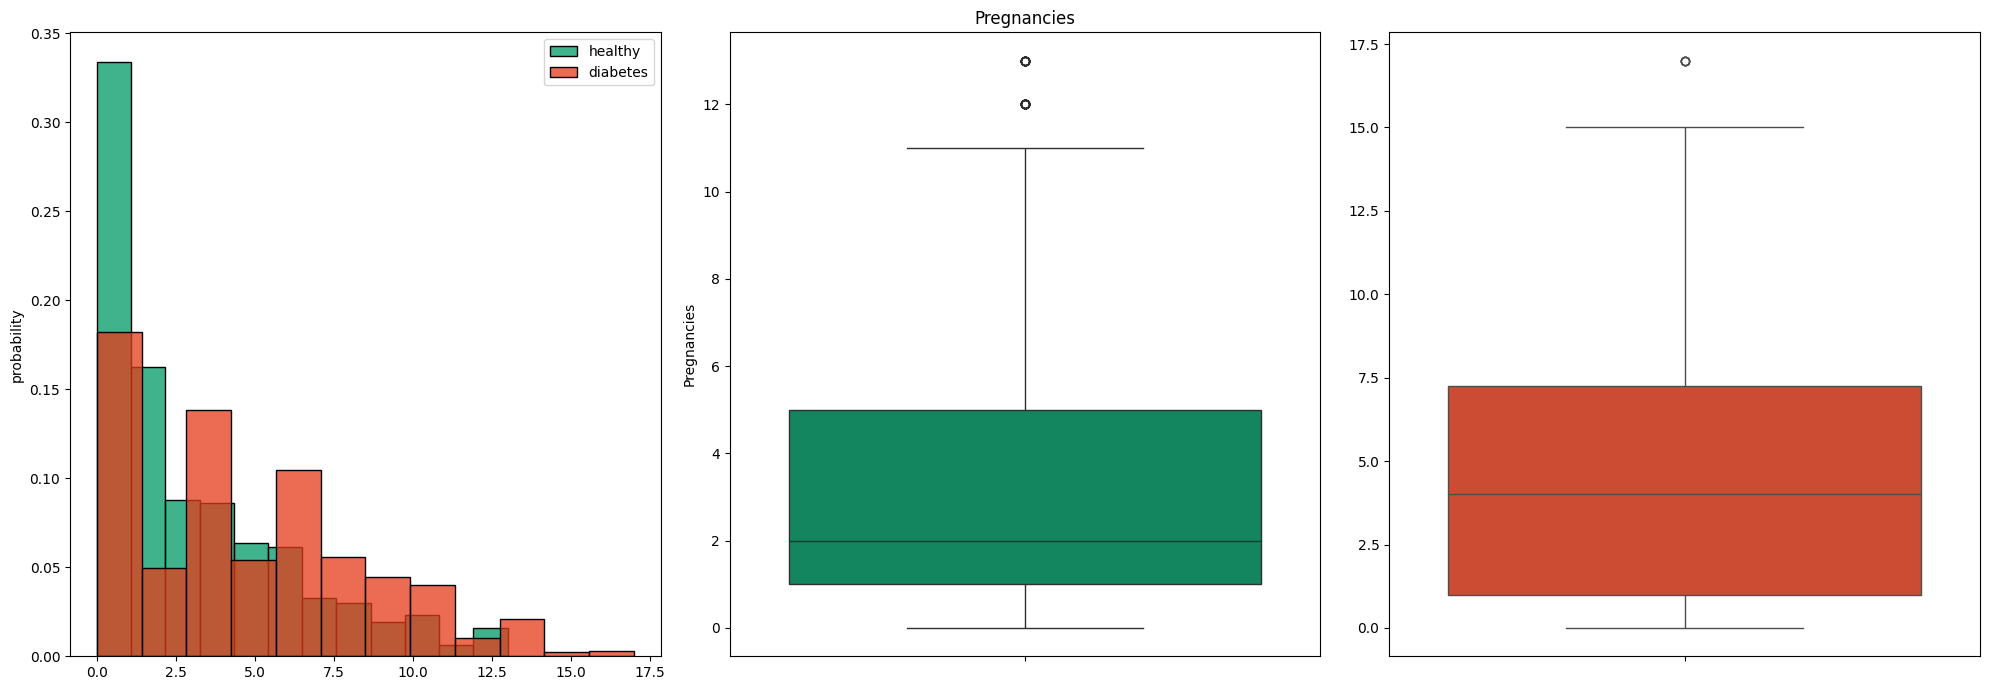

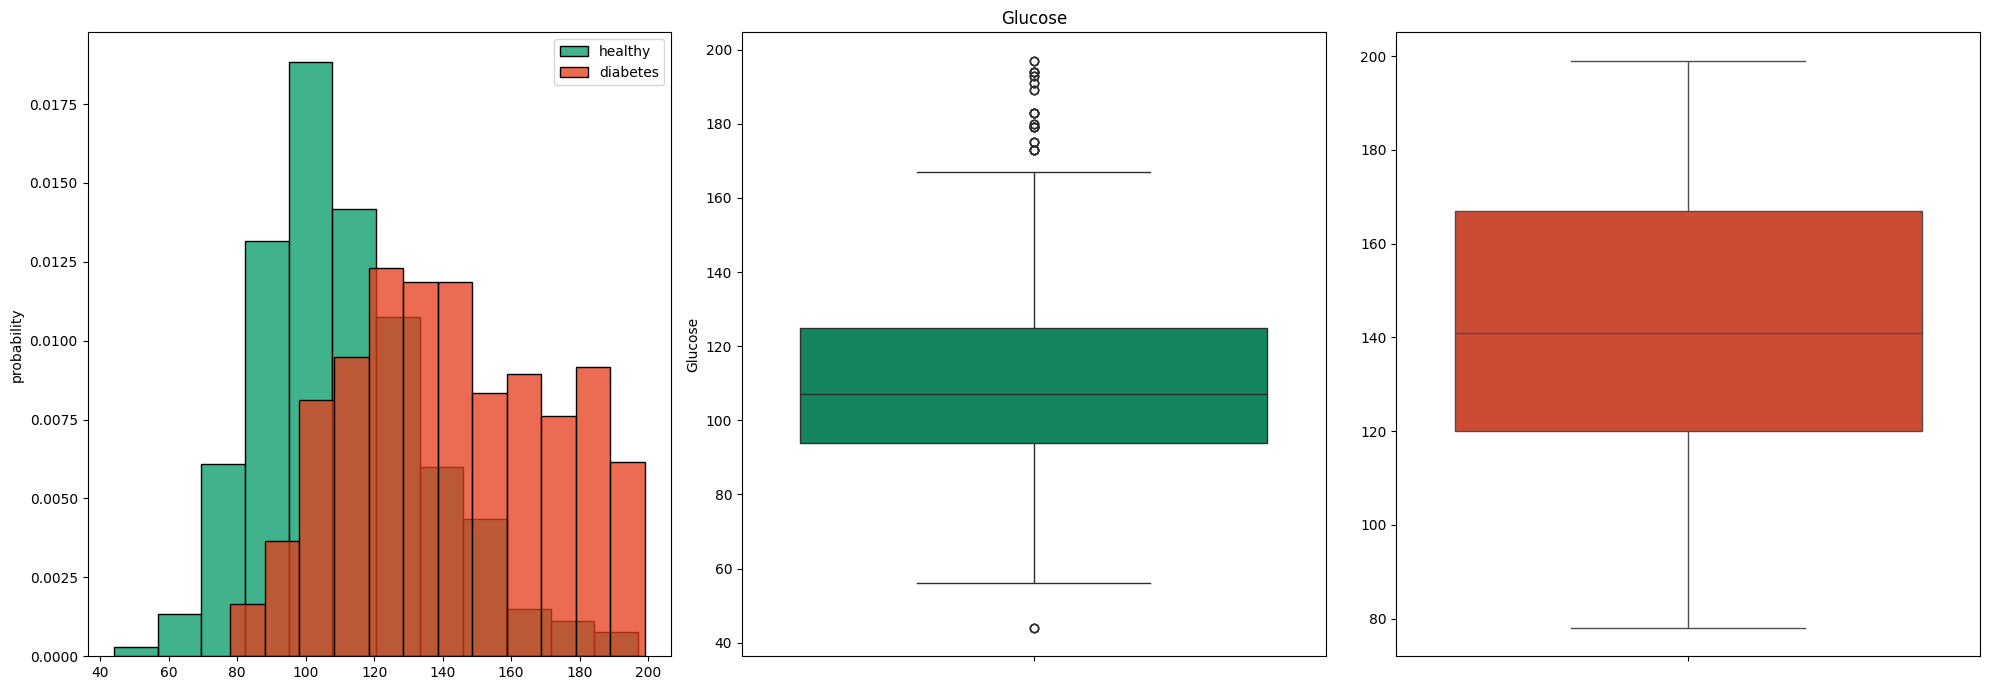

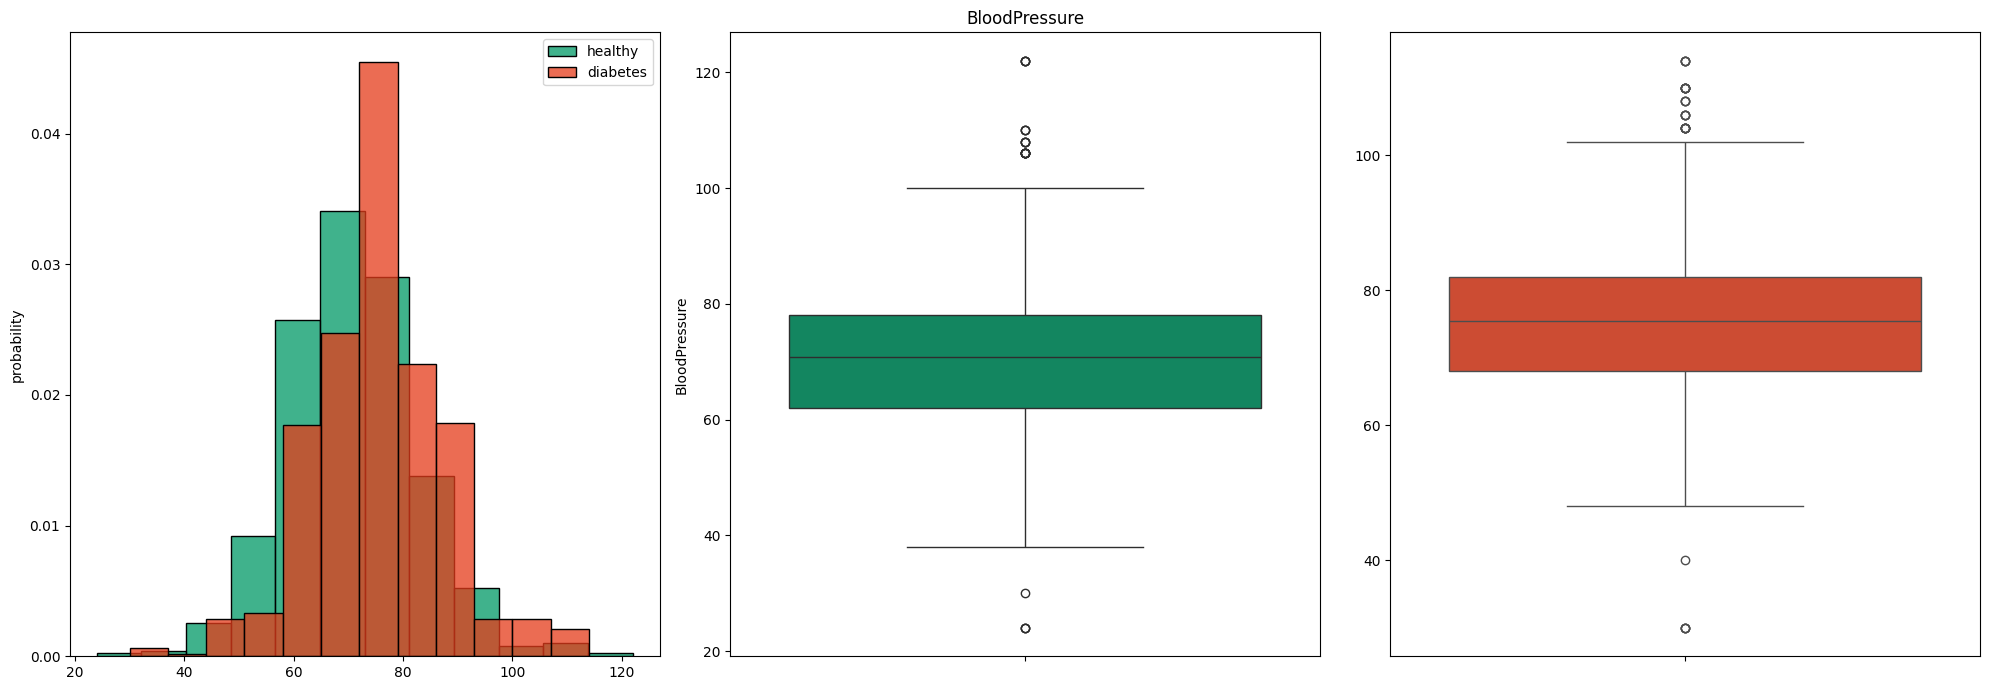

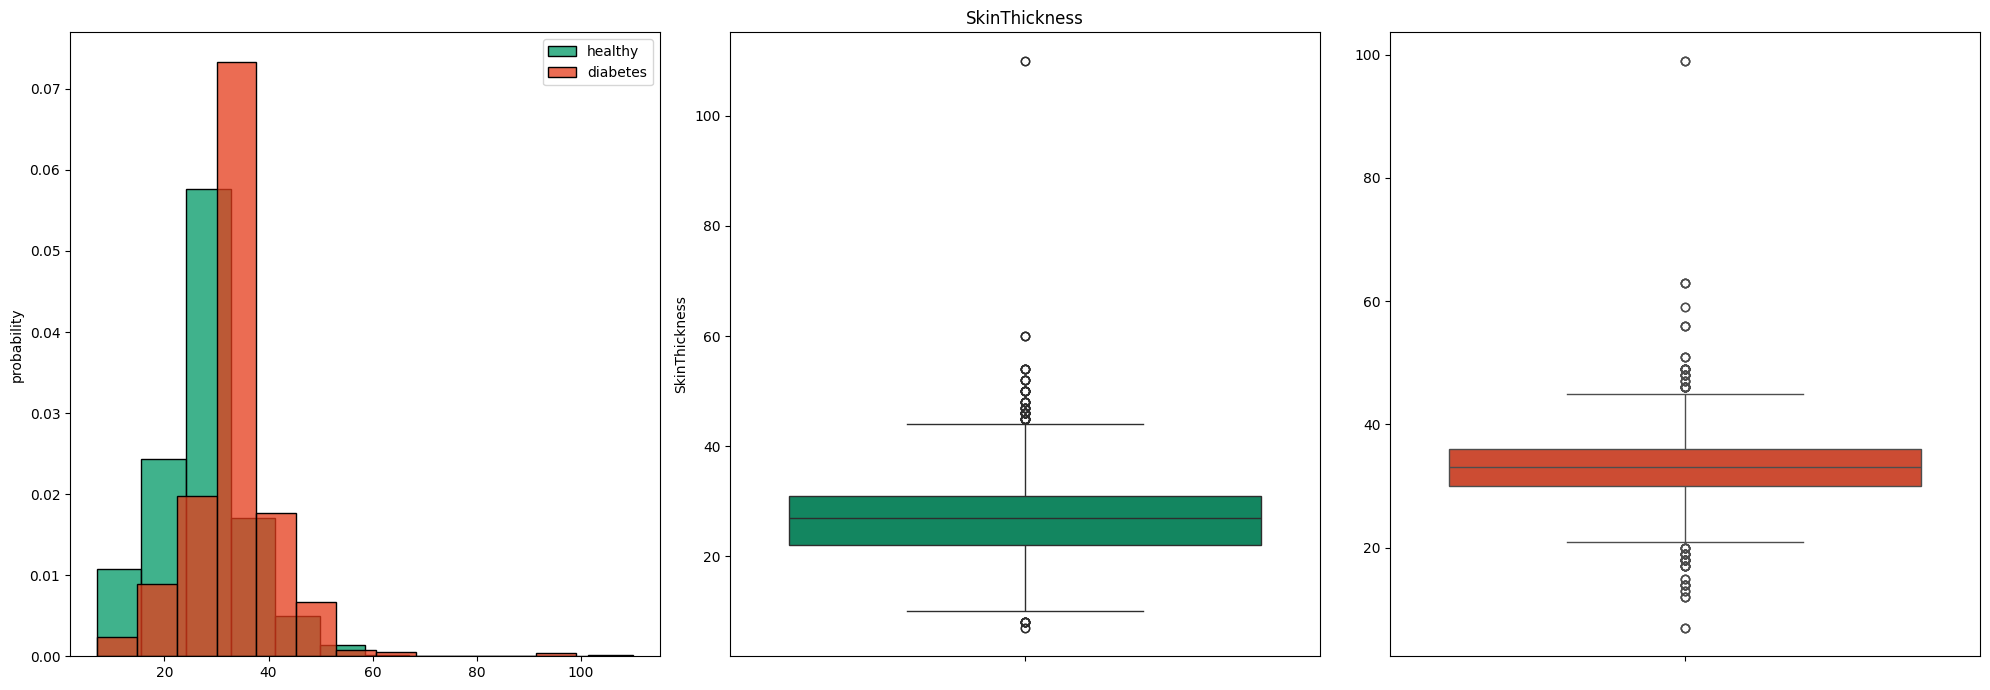

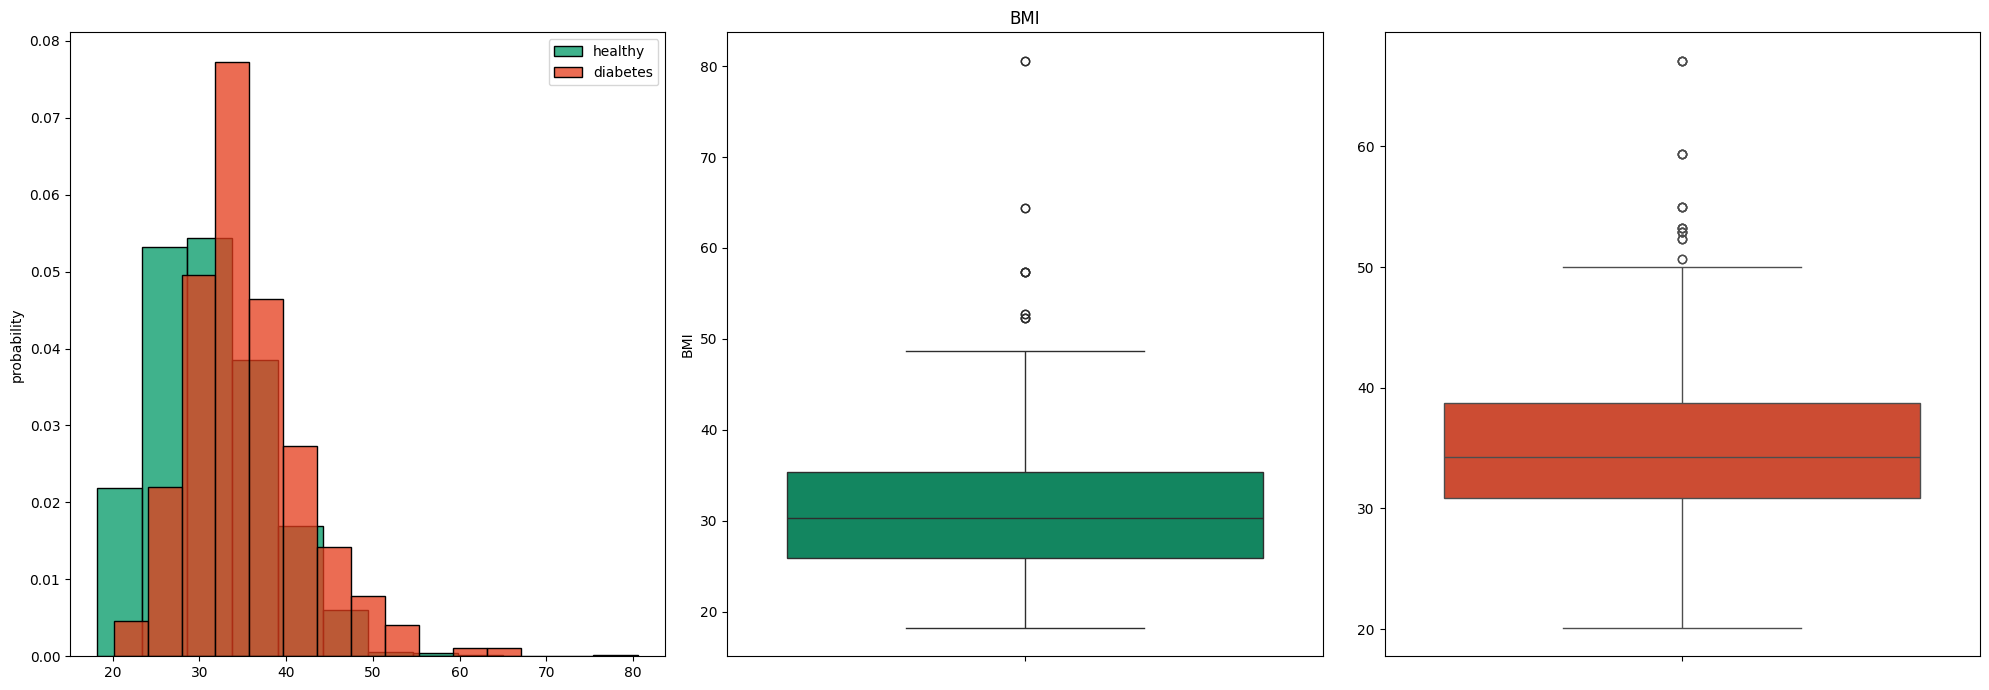

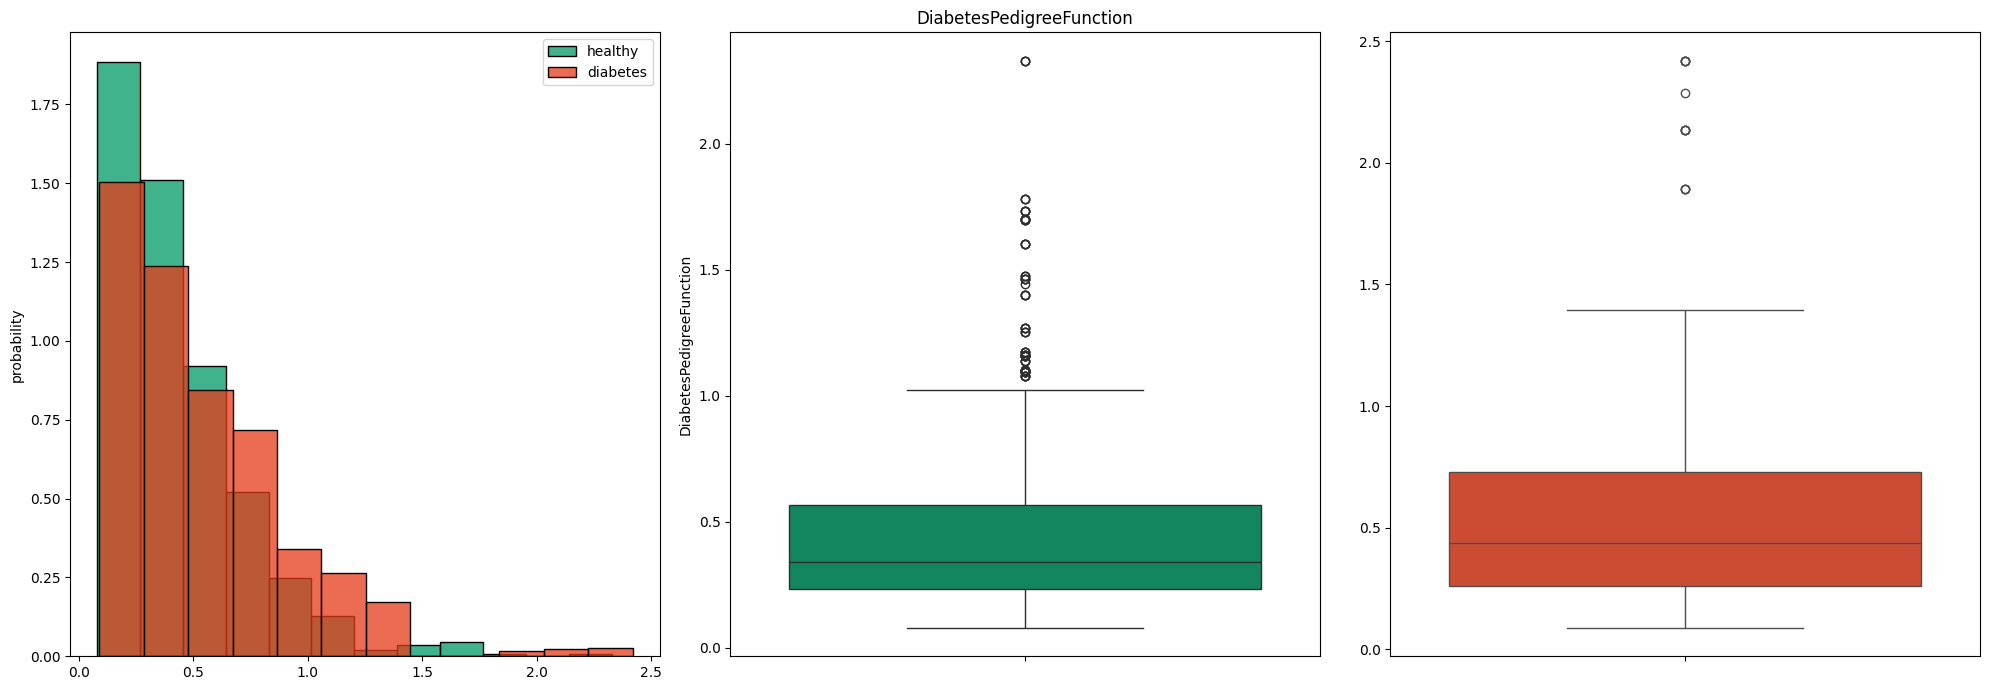

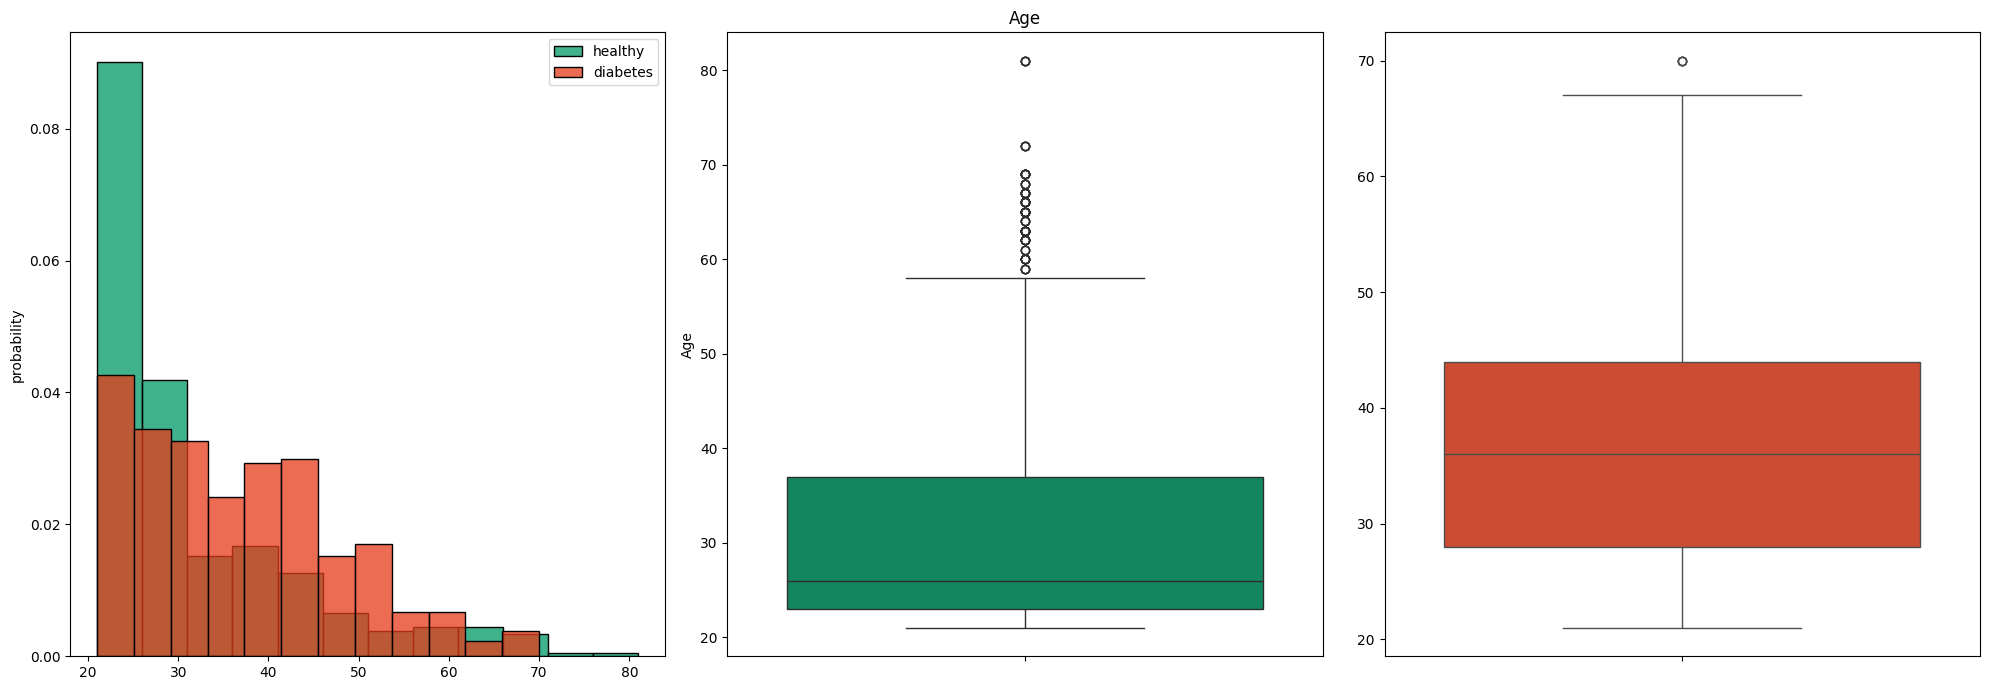

In [230]:
for column in df.drop(columns=["Id", "Outcome"]):
    fig, axs = plt.subplots(1, 3, figsize=(20, 7))
    axs = axs.flatten()

    bins = 25
    if column == "Pregnancies" or "Age":
        bins = 12
   
    sns.histplot(df[df["Outcome"] == 0][column], bins=bins, color="#009966",  label="healthy", stat="density", ax=axs[0])
    sns.histplot(df[df["Outcome"] == 1][column], bins=bins, color="#E53B1A", label="diabetes", stat="density", ax=axs[0])
    
    sns.boxplot(df[df["Outcome"] == 0][column], color="#009966", ax=axs[1])
    sns.boxplot(df[df["Outcome"] == 1][column], color="#E53B1A", ax=axs[2])
    
    axs[1].set_title(column)
    axs[0].set_xlabel("")
    axs[0].set_ylabel("probability")
    #axs[1].set_ylabel("")
    axs[2].set_ylabel("")
    axs[0].legend()
    plt.tight_layout()
    plt.show()

In [223]:
glucose_median_healthy = df[df["Outcome"] == 0]["Glucose"][df["Glucose"] > 0].median()
row_to_change = df[df["Outcome"] == 0]["Glucose"][df["Glucose"] == 0]
#df[df["Outcome"] == 0]["Glucose"].apply(lambda x: glucose_median_healthy if x==0 else x)

glucose_median_diabetes = df[df["Outcome"] == 1]["Glucose"][df["Glucose"] > 0].median()
#row_to_change = df[df["Outcome"] == 1]["Glucose"][df["Glucose"] == 0]
#df["Glucose"] = df[df["Outcome"] == 1]["Glucose"].apply(lambda x: glucose_median_diabetes if x==0 else x)

glucose_diabetes = df[df["Outcome"] == 1]["Id"][df["Glucose"] == 0]
glucose_diabetes


349      350
502      503
788      789
1117    1118
1270    1271
1587    1588
1740    1741
2370    2371
Name: Id, dtype: int64

In [224]:
glucose_median_healthy = df[df["Outcome"] == 0]["Glucose"][df["Glucose"] > 0].median()
glucose_healthy = df[df["Outcome"] == 0]["Id"][df["Glucose"] == 0]

for index in glucose_healthy:
    df.loc[index-1, "Glucose"] = glucose_median_healthy


glucose_median_diabetes = df[df["Outcome"] == 1]["Glucose"][df["Glucose"] > 0].median()
glucose_diabetes = df[df["Outcome"] == 1]["Id"][df["Glucose"] == 0]

for index in glucose_diabetes:
    df.loc[index-1, "Glucose"] = glucose_median_diabetes


In [225]:
bmi_median_healthy = df[df["Outcome"] == 0]["BMI"][df["BMI"] > 0].median()
bmi_healthy = df[df["Outcome"] == 0]["Id"][df["BMI"] == 0]

for index in bmi_healthy:
    df.loc[index-1, "BMI"] = bmi_median_healthy


bmi_median_diabetes = df[df["Outcome"] == 1]["BMI"][df["BMI"] > 0].median()
bmi_diabetes = df[df["Outcome"] == 1]["Id"][df["BMI"] == 0]

for index in bmi_diabetes:
    df.loc[index-1, "BMI"] = bmi_median_diabetes


In [226]:
blood_pressure_mean_healthy = df[df["Outcome"] == 0]["BloodPressure"][df["BloodPressure"] > 0].mean()
blood_pressure_healthy = df[df["Outcome"] == 0]["Id"][df["BloodPressure"] == 0]

for index in blood_pressure_healthy:
    df.loc[index-1, "BloodPressure"] = blood_pressure_mean_healthy


blood_pressure_mean_diabetes = df[df["Outcome"] == 1]["BloodPressure"][df["BloodPressure"] > 0].mean()
blood_pressure_diabetes = df[df["Outcome"] == 1]["Id"][df["BloodPressure"] == 0]

for index in blood_pressure_diabetes:
    df.loc[index-1, "BloodPressure"] = blood_pressure_mean_diabetes


/var/folders/fv/xq0ksdjj6qs_gmxn6yvd1j7c0000gn/T/ipykernel_19023/2796617686.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '70.85051546391753' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index-1, "BloodPressure"] = blood_pressure_mean_healthy


In [227]:
skin_thickness_median_healthy = df[df["Outcome"] == 0]["SkinThickness"][df["SkinThickness"] > 0].median()
skin_thickness_healthy = df[df["Outcome"] == 0]["Id"][df["SkinThickness"] == 0]

for index in skin_thickness_healthy:
    df.loc[index-1, "SkinThickness"] = skin_thickness_median_healthy


skin_thickness_mean_diabetes = df[df["Outcome"] == 1]["SkinThickness"][df["SkinThickness"] > 0].mean()
skin_thickness_diabetes = df[df["Outcome"] == 1]["Id"][df["SkinThickness"] == 0]

for index in skin_thickness_diabetes:
    df.loc[index-1, "SkinThickness"] = skin_thickness_mean_diabetes

/var/folders/fv/xq0ksdjj6qs_gmxn6yvd1j7c0000gn/T/ipykernel_19023/1828884627.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '33.108191653786704' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index-1, "SkinThickness"] = skin_thickness_mean_diabetes


In [228]:
df = df.drop(columns="Insulin")

In [231]:
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72.0,35.000000,33.6,0.627,50,1
1,2,1,85,66.0,29.000000,26.6,0.351,31,0
2,3,8,183,64.0,33.108192,23.3,0.672,32,1
3,4,1,89,66.0,23.000000,28.1,0.167,21,0
4,5,0,137,40.0,35.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64.0,24.000000,29.7,0.370,33,0
2764,2765,8,179,72.0,42.000000,32.7,0.719,36,1
2765,2766,6,85,78.0,27.000000,31.2,0.382,42,0
2766,2767,0,129,110.0,46.000000,67.1,0.319,26,1


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/fv/xq0ksdjj6qs_gmxn6yvd1j7c0000gn/T/ipykernel_19023/819827207.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


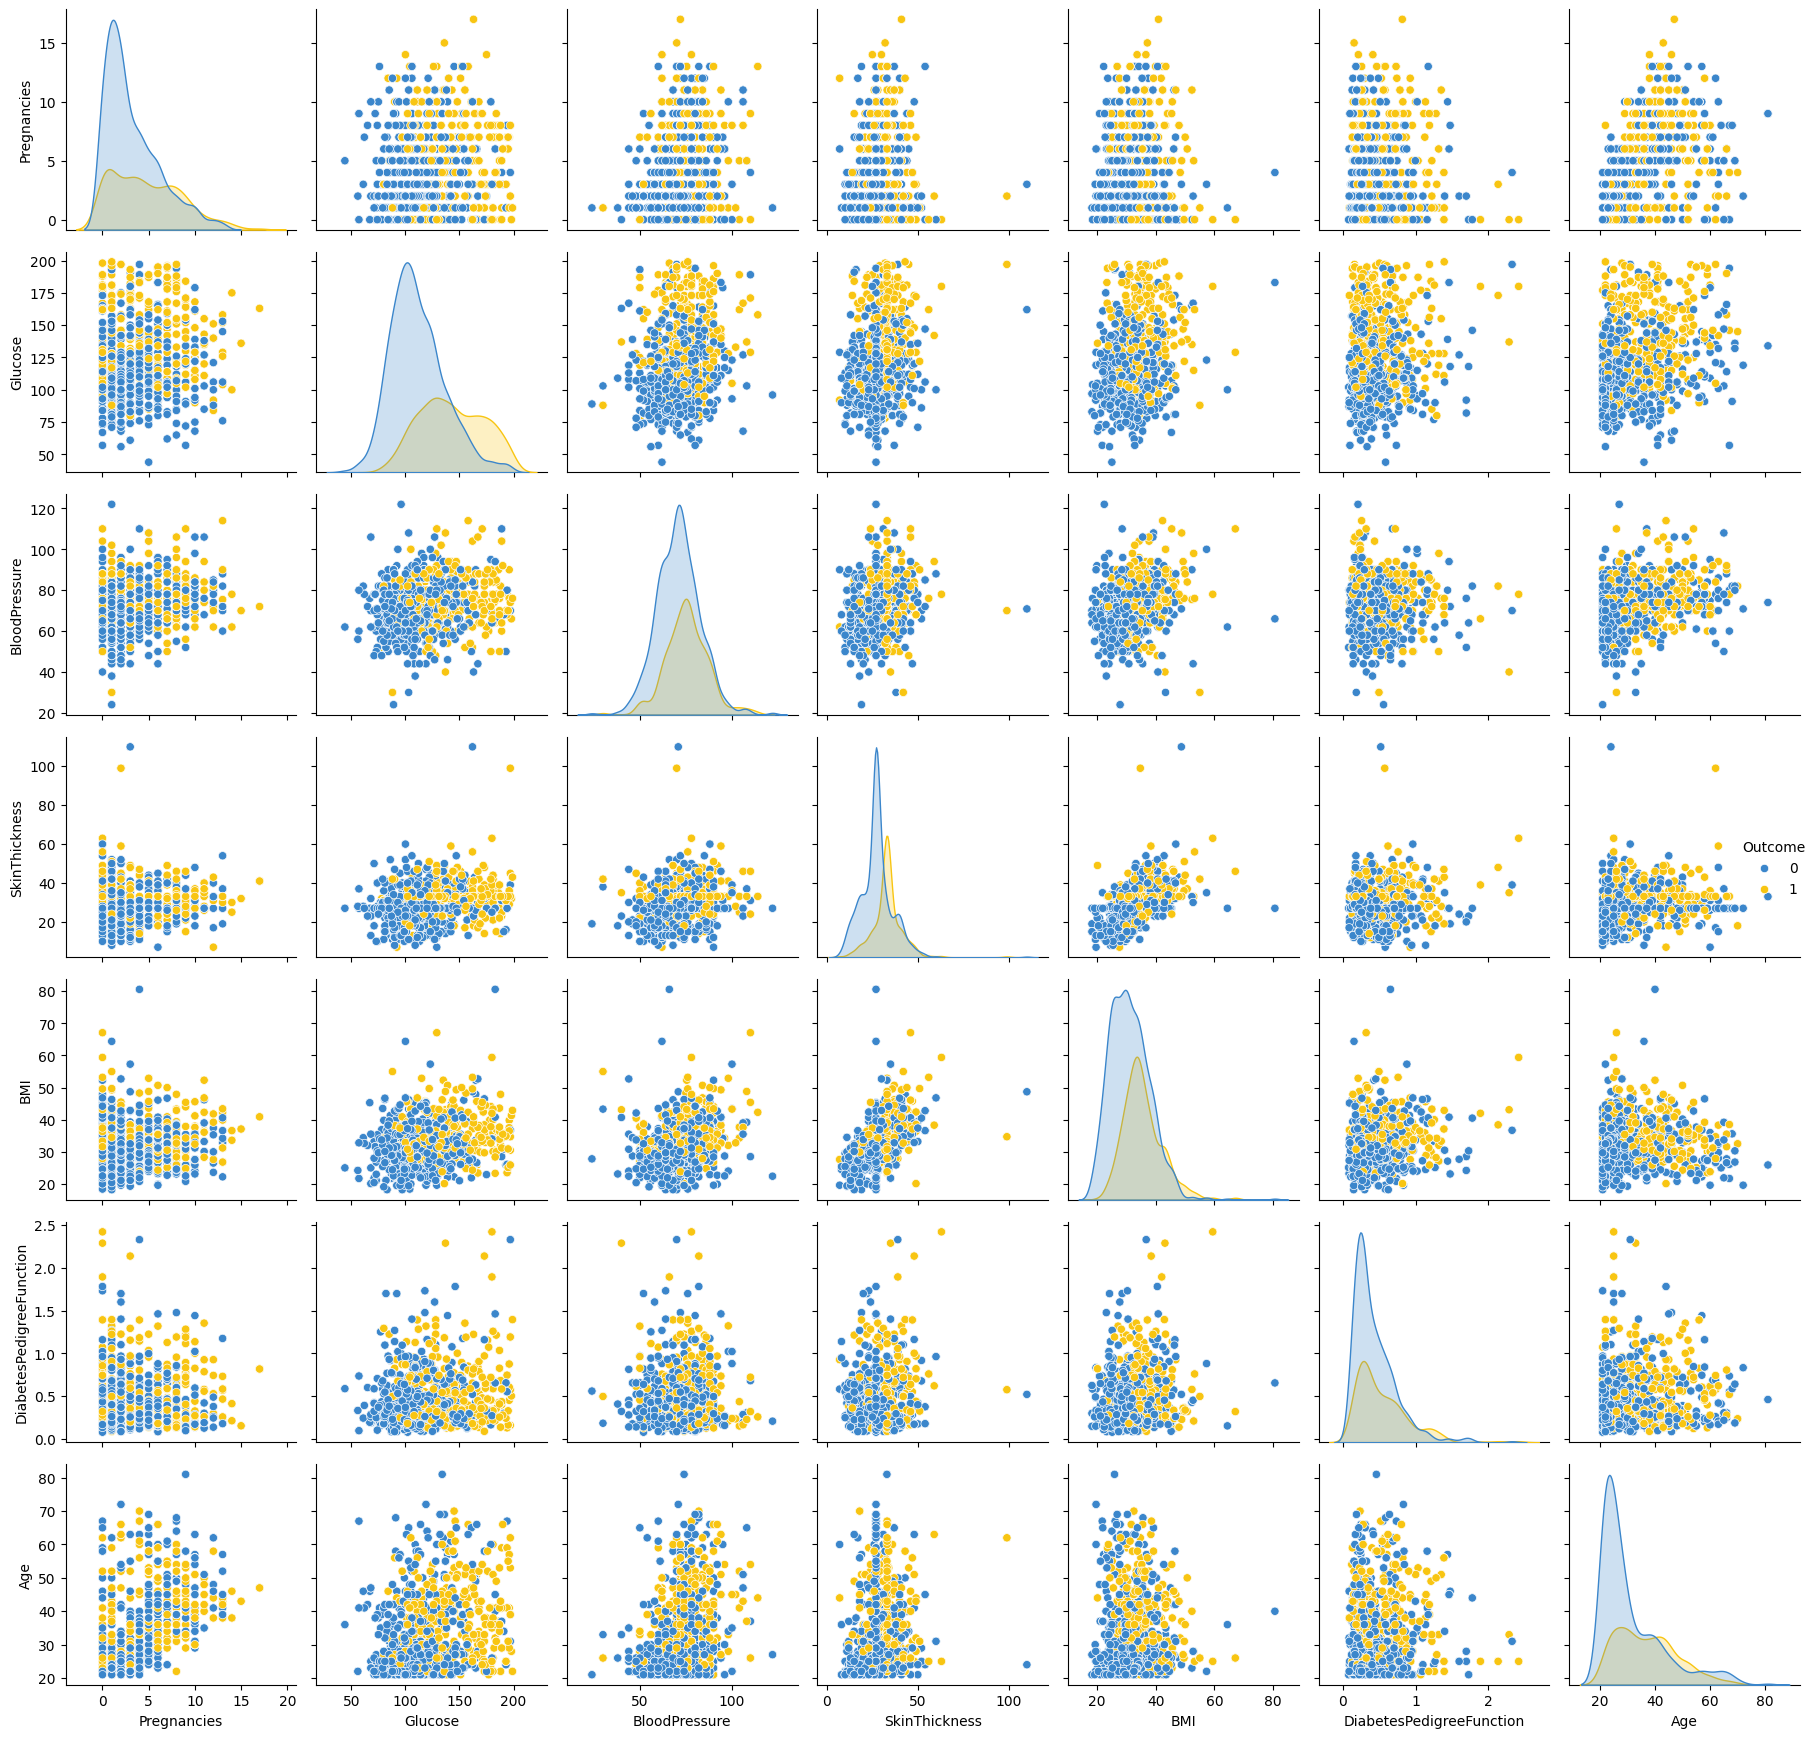

In [232]:
sns.pairplot(data=df, vars=df.columns[1:8], hue="Outcome", palette=["#3B86CB", "#F8C512"])
plt.tight_layout()

<Axes: >

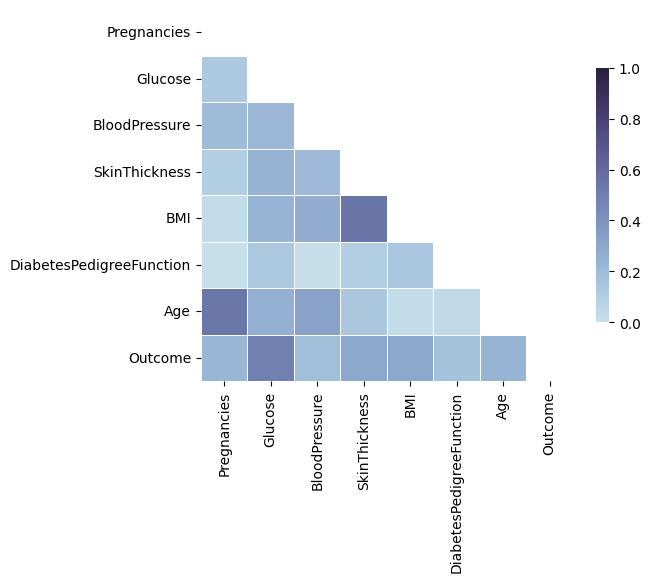

In [233]:
correlation_matrix = df[df.columns[1:]].corr()

fig, ax = plt.subplots(figsize=(6, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

sns.heatmap(correlation_matrix, vmin=0, vmax=1, linewidth=0.5, cmap=cmap, square=True, 
            mask=mask, cbar_kws={"shrink": 0.55} )

In [234]:
correlation_matrix.drop("Outcome")

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125502,0.201621,0.095036,0.016170,-0.027731,0.540805,0.223796
Glucose,0.125502,1.000000,0.211099,0.243855,0.237511,0.128991,0.263983,0.492622
BloodPressure,0.201621,0.211099,1.000000,0.208679,0.269402,0.008267,0.323721,0.181260
SkinThickness,0.095036,0.243855,0.208679,1.000000,0.546597,0.098446,0.136203,0.300629
BMI,0.016170,0.237511,0.269402,0.546597,1.000000,0.144425,0.022044,0.293301
DiabetesPedigreeFunction,-0.027731,0.128991,0.008267,0.098446,0.144425,1.000000,0.028544,0.160664
Age,0.540805,0.263983,0.323721,0.136203,0.022044,0.028544,1.000000,0.237050


In [235]:
correlation_between_features = (correlation_matrix.where(np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1))
                                .stack()
                                .sort_values(ascending=False))

print(f"The top 10 highest correlation coefficients between individual features: \n\n{correlation_between_features.nlargest(10)}")

The top 10 highest correlation coefficients between individual features: 

SkinThickness  BMI              0.546597
Pregnancies    Age              0.540805
Glucose        Outcome          0.492622
BloodPressure  Age              0.323721
SkinThickness  Outcome          0.300629
BMI            Outcome          0.293301
BloodPressure  BMI              0.269402
Glucose        Age              0.263983
               SkinThickness    0.243855
               BMI              0.237511
dtype: float64


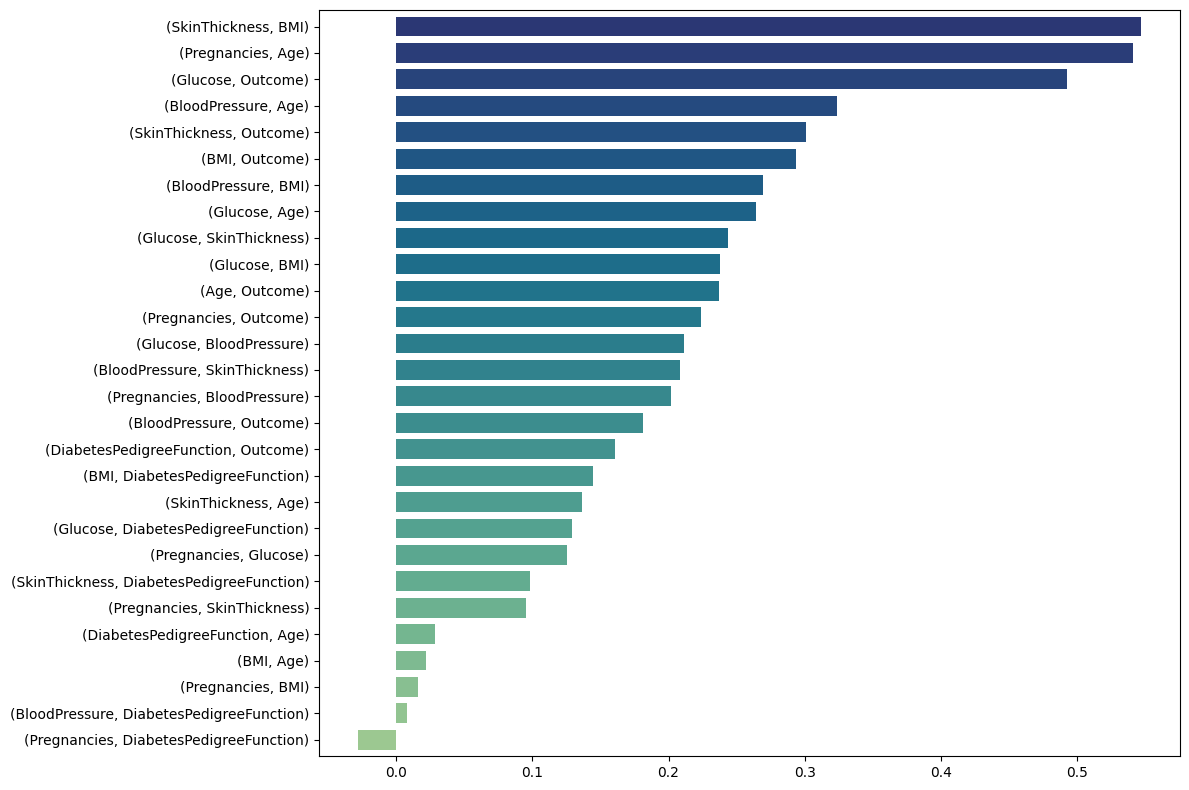

In [285]:
plt.figure(figsize=(12, 8))
color = sns.color_palette("crest", 28)
color.reverse()
correlation_between_features.plot.barh(color=color, width=0.75).invert_yaxis()
plt.tight_layout()

In [236]:
corr_with_outcome = correlation_matrix.drop("Outcome")["Outcome"].sort_values(ascending=False)
print(f"Correlation coefficient of individual features with the target: \n\n{corr_with_outcome}")

Correlation coefficient of individual features with the target: 

Glucose                     0.492622
SkinThickness               0.300629
BMI                         0.293301
Age                         0.237050
Pregnancies                 0.223796
BloodPressure               0.181260
DiabetesPedigreeFunction    0.160664
Name: Outcome, dtype: float64


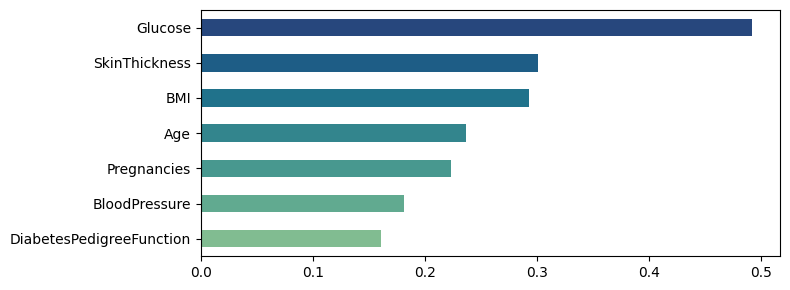

In [283]:
plt.figure(figsize=(8, 3))
color = sns.color_palette('crest', 7)
color.reverse()
corr_with_outcome.plot.barh(color=color).invert_yaxis()
plt.tight_layout()

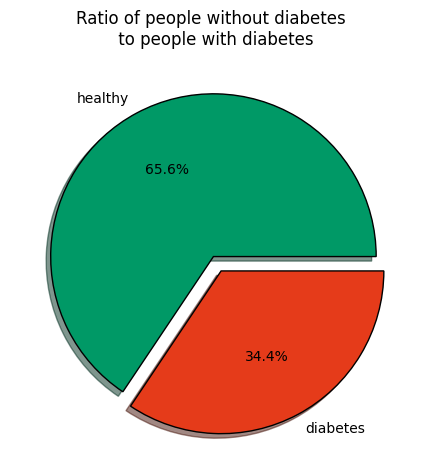

In [238]:
outcome_count = df['Outcome'].value_counts()

outcome_count.plot(kind="pie",
                    title="Ratio of people without diabetes \n to people with diabetes",
                    labels=["healthy", "diabetes"], 
                    ylabel="",
                    colors=["#009966", "#E53B1A"], 
                    explode=[0, 0.1], 
                    shadow=True, 
                    autopct='%1.1f%%', 
                    radius=1, 
                    wedgeprops={"edgecolor": "black"})

plt.tight_layout()
plt.show()